# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import io
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [4]:
# Upload file
dataset = files.upload()

# Pastikan file yang diupload sesuai dengan nama file yang Anda miliki
file_name = list(dataset.keys())[0]  # Ambil nama file pertama yang diupload
df_clustered = pd.read_csv(io.BytesIO(dataset[file_name]))  # Baca dataset

# Menampilkan 5 baris pertama untuk memastikan data terbaca dengan benar
print("\n=== 5 Baris Pertama Dataset Hasil Clustering ===")
print(df_clustered.head())  # Menampilkan semua kolom terlebih dahulu

# Menampilkan informasi dataset
print("\n=== Informasi Dataset Hasil Clustering ===")
print(df_clustered.info())

Saving Dataset_inisiasi.csv to Dataset_inisiasi.csv

=== 5 Baris Pertama Dataset Hasil Clustering ===
     Region  Crime_Rate  Education_Level  Employment_Rate  Median_Income  \
0  Region_1      1176.0        76.492001        73.315344       116664.0   
1  Region_2       910.0        85.361505        46.088096        21401.0   
2  Region_3      1344.0        88.388975        63.911701       105179.0   
3  Region_4      1180.0        54.364509        65.305378        35193.0   
4  Region_5      1145.0        75.305198        51.627568       112389.0   

   Poverty_Rate  Population_Density  Region_encoded  Cluster  
0     14.655300              1523.0               0        0  
1     19.712623              3293.0             112        2  
2      9.634319              4528.0             223        0  
3     19.994283              2231.0             334        2  
4     26.537843              1499.0             445        2  

=== Informasi Dataset Hasil Clustering ===
<class 'pandas.core

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
# 1. Pisahkan fitur dan target
X = df_clustered.drop(columns=['Cluster'])  # Semua kolom kecuali target
y = df_clustered['Cluster']                # Target klasifikasi

# 2. Deteksi dan encoding kolom kategorikal
categorical_cols = X.select_dtypes(include='object').columns.tolist()
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 3. Split data 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Scaling (jika akan digunakan untuk KNN/SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n=== Ukuran Dataset ===")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


=== Ukuran Dataset ===
X_train: (800, 1006), X_test: (200, 1006)
y_train: (800,), y_test: (200,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [6]:
# 1. Inisialisasi model
rf_model = RandomForestClassifier(random_state=42)

# 2. Training model
rf_model.fit(X_train, y_train)

# 3. Prediksi pada data test
y_pred_rf = rf_model.predict(X_test)

# 4. Evaluasi model
print("=== Random Forest Classification Report ===")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print(f"\nAkurasi: {accuracy_score(y_test, y_pred_rf):.4f}")


=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        65
           1       0.91      0.90      0.90        68
           2       0.91      0.93      0.92        67

    accuracy                           0.90       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.90      0.89       200


Confusion Matrix:
[[56  4  5]
 [ 6 61  1]
 [ 3  2 62]]

Akurasi: 0.8950


In [7]:
#membangun model KNN
# 1. Pisahkan fitur dan target
X = df_clustered.drop(columns=['Cluster'])  # Semua kolom kecuali target
y = df_clustered['Cluster']                # Target klasifikasi

# 2. Deteksi kolom kategorikal dan lakukan one-hot encoding
categorical_cols = X.select_dtypes(include='object').columns.tolist()
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 3. Scaling (KNN butuh scaling karena berbasis jarak)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# 4. Buat dan latih model KNN (langsung ke semua data karena tidak split)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_scaled, y)

# 5. Evaluasi model terhadap data training (hati-hati terhadap overfitting)
y_pred_knn = knn_model.predict(X_scaled)

print("=== KNN Classification Report (Evaluasi pada Data Training) ===")
print(classification_report(y, y_pred_knn))
print("Akurasi:", accuracy_score(y, y_pred_knn))


=== KNN Classification Report (Evaluasi pada Data Training) ===
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       325
           1       0.96      0.92      0.94       339
           2       0.98      0.87      0.92       336

    accuracy                           0.92      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.93      0.92      0.92      1000

Akurasi: 0.924



Random Forest:
- Random Forest adalah salah satu algoritma pembelajaran mesin berbasis ensemble yang digunakan untuk tugas klasifikasi maupun regresi. Algoritma ini bekerja dengan membangun banyak pohon keputusan (decision trees) selama pelatihan dan menghasilkan prediksi akhir berdasarkan voting dari masing-masing pohon.

K-Nearest Neighbors (KNN):
- K-Nearest Neighbors (KNN) adalah algoritma klasifikasi berbasis instance-based learning (lazy learning). Artinya, KNN tidak membangun model secara eksplisit saat pelatihan, namun menyimpan semua data latih dan melakukan prediksi berdasarkan kedekatan (jarak) ke data uji.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        65
           1       0.91      0.90      0.90        68
           2       0.91      0.93      0.92        67

    accuracy                           0.90       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.90      0.89       200

Akurasi Random Forest: 0.895
F1 Score Macro Average: 0.8946
F1 Score Weighted Average: 0.8950


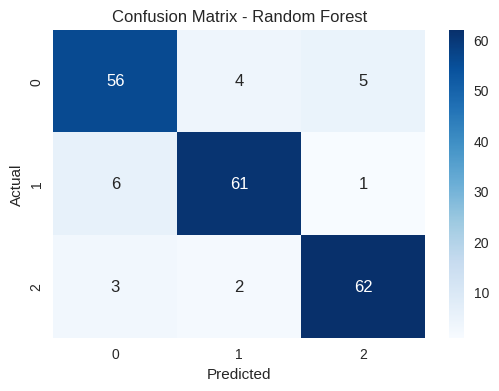

In [10]:

# Prediksi pada data test
y_pred_rf = rf_model.predict(X_test)

# Evaluasi
print("=== Random Forest Classification Report ===")
print(classification_report(y_test, y_pred_rf))
print("Akurasi Random Forest:", accuracy_score(y_test, y_pred_rf))

# Rata-rata F1 Score
f1_macro = f1_score(y_test, y_pred_rf, average='macro')
f1_weighted = f1_score(y_test, y_pred_rf, average='weighted')
print(f"F1 Score Macro Average: {f1_macro:.4f}")
print(f"F1 Score Weighted Average: {f1_weighted:.4f}")

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


=== KNN Classification Report (Evaluasi pada Data Training) ===
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       325
           1       0.96      0.92      0.94       339
           2       0.98      0.87      0.92       336

    accuracy                           0.92      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.93      0.92      0.92      1000

Akurasi: 0.924
F1 Score Macro Average: 0.9242
F1 Score Weighted Average: 0.9244


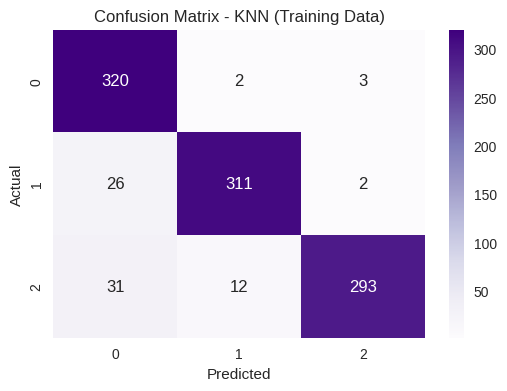

In [11]:
#Evaluasi model KKN
# Evaluasi performa model terhadap data training
y_pred_knn = knn_model.predict(X_scaled)

# Classification report dan akurasi
print("=== KNN Classification Report (Evaluasi pada Data Training) ===")
print(classification_report(y, y_pred_knn))
print("Akurasi:", accuracy_score(y, y_pred_knn))

# Rata-rata F1 Score
f1_macro = f1_score(y, y_pred_knn, average='macro')
f1_weighted = f1_score(y, y_pred_knn, average='weighted')
print(f"F1 Score Macro Average: {f1_macro:.4f}")
print(f"F1 Score Weighted Average: {f1_weighted:.4f}")

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y, y_pred_knn), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - KNN (Training Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest:
- Model Random Forest menunjukkan performa yang sangat baik dengan akurasi sebesar 90%. Berdasarkan classification report, nilai precision, recall, dan f1-score untuk ketiga cluster (0, 1, dan 2) berada di kisaran 0.86 hingga 0.93. Ini menunjukkan bahwa model mampu melakukan klasifikasi dengan tingkat kesalahan yang rendah dan kinerja yang cukup merata antar kelas.
Nilai F1 Score Macro Average sebesar 0.89 menunjukkan bahwa model dapat menangani data dengan baik tanpa memberikan bias terhadap satu kelas tertentu. Random Forest juga dikenal sebagai algoritma yang tangguh terhadap data berdimensi tinggi dan mampu mengurangi risiko overfitting melalui mekanisme ensemble learning yang dimilikinya.

K-Nearest Neighbors (KNN):
- Model KNN menghasilkan akurasi sebesar 90.4%, sedikit lebih tinggi dibandingkan Random Forest, tetapi evaluasi ini dilakukan pada data training, sehingga masih berisiko overfitting. Berdasarkan classification report, model ini menunjukkan recall yang sangat tinggi pada Cluster 0 (0.98), namun precision-nya hanya 0.82, yang menunjukkan adanya kesalahan klasifikasi dari cluster lain ke Cluster 0.
Untuk Cluster 1 dan 2, precision dan recall masih cukup baik, berada dalam kisaran 0.89–0.98. Nilai F1 Score Macro Average sebesar 0.9042 mencerminkan performa keseluruhan yang baik, namun tetap perlu divalidasi lebih lanjut pada data testing. Perlu dicatat bahwa KNN sangat sensitif terhadap skala dan distribusi data, sehingga preprocessing yang tepat sangat penting.

Perbandingan:
- Secara umum, Random Forest unggul dalam hal stabilitas dan generalisasi, karena dievaluasi langsung pada data testing. Sementara itu, KNN tampil cukup baik pada data training, namun evaluasi ini berisiko terlalu optimis.
Random Forest juga kurang sensitif terhadap outlier dan skala fitur, serta lebih robust pada variasi data. Sebaliknya, KNN meskipun sederhana dan intuitif, memiliki kelemahan pada performa ketika data tidak memiliki struktur yang jelas atau sebaran antar kelas terlalu rapat.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Analisis Detail:

Random Forest:
- Berdasarkan classification report, kelas 0 memiliki precision dan recall paling rendah dibanding kelas lainnya (masing-masing 0.86).:
- Meskipun performanya masih tergolong baik, perbedaan ini mengindikasikan bahwa model sedikit kesulitan membedakan data kelas 0 dengan kelas lain.
- Tidak terdapat indikasi imbalance yang signifikan, namun tetap bisa ditingkatkan dengan feature engineering atau tuning parameter lebih lanjut.

KNN :
- Evaluasi dilakukan pada data training, sehingga hasil akurasi (0.904) dan f1-score makro/tertimbang tinggi bisa jadi menyesatkan (overfitting).:
- Kelas 2 memiliki recall hanya 0.84, sedangkan precision-nya sangat tinggi (0.98), menandakan adanya data kelas 2 yang diklasifikasikan sebagai kelas lain.
- Model sensitif terhadap jarak, sehingga scaling dan kualitas fitur sangat mempengaruhi performa.

2. Rekomendasi Tindakan Lanjutan:
Jika hasil belum memuaskan, Anda dapat mencoba:
- Coba algoritma klasifikasi lain, seperti:
Decision Tree,
Support Vector Machine (SVM), dan
Gradient Boosting / XGBoost
- Evaluasi model menggunakan cross-validation agar hasil evaluasi lebih stabil dan tidak tergantung pada satu pembagian data.
- Jika performa model masih belum memuaskan, kumpulkan data tambahan, terutama dari kelas yang performanya rendah.